In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [68]:
# checking for missing values
print(df.shape)
df.info()

(991346, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglo

In [69]:
# checking for null values
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [70]:
# dropping unnecessary columns

df1 = df.drop(['sex', 'age', 'height', 'waistline', 'hear_left', 'hear_right', 'sight_left', 'sight_right'], axis=1)
print(df1.shape)
df1.head()

(991346, 16)


,weight,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,75,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,80,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,75,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,80,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,60,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


In [71]:
# deleting dupicate entries
df1 = df1.drop_duplicates()
df1.reset_index(inplace=True, drop=True)
df1.shape

(991320, 16)

In [72]:
df1['DRK_YN'].replace({'N':'0'}, inplace= True)
df1['DRK_YN'].replace({'Y':'1'}, inplace= True)
df1.head()

,weight,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,75,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,1
1,80,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,0
2,75,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,0
3,80,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,0
4,60,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,0


In [73]:
df1['DRK_YN']=df1['DRK_YN'].astype('int64')
df1['DRK_YN'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 991320 entries, 0 to 991319
Series name: DRK_YN
Non-Null Count   Dtype
--------------   -----
991320 non-null  int64
dtypes: int64(1)
memory usage: 7.6 MB


In [74]:
# clearing inconsistent data 

In [75]:
for var in df1.columns:
    if var in ['SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','hemoglobin','SGOT_AST','SGOT_ALT','gamma_GTP','SMK_stat_type_cd']: continue
    df1 = df1[np.abs(df1[var] - df1[var].mean()) <= (3 * df1[var].std())]

In [76]:
df1.shape

(960983, 16)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [78]:
c = df1.corr()

<Axes: >

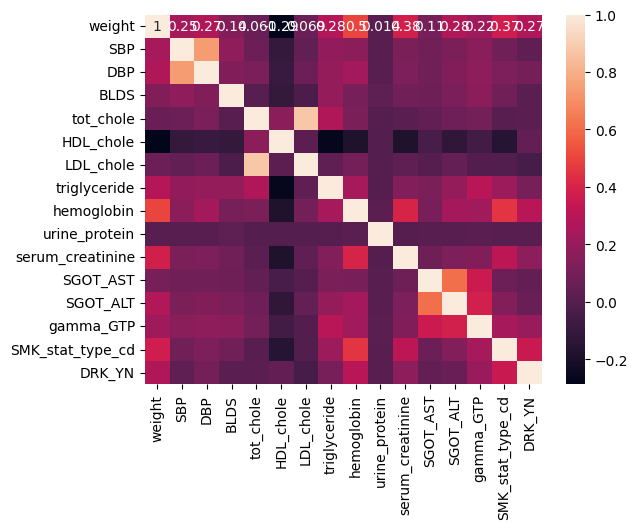

In [79]:
sns.heatmap(c, xticklabels= c.columns, yticklabels=c.columns, 
            annot=True)

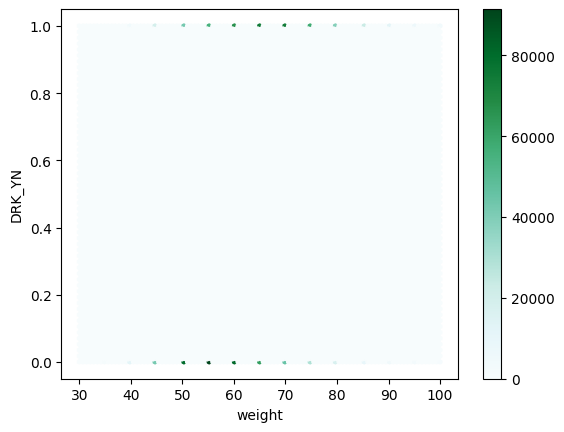

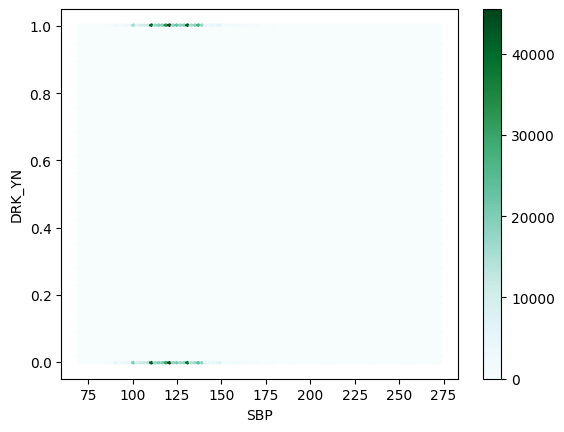

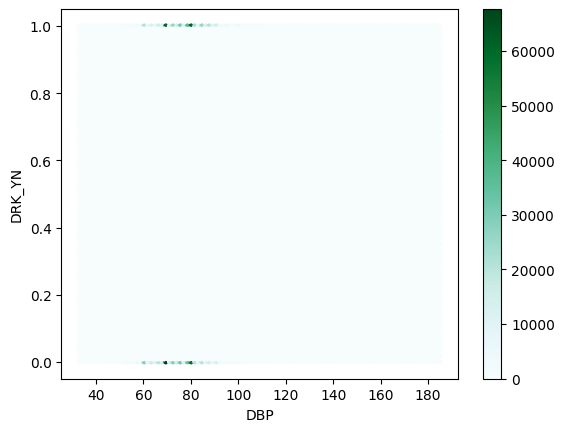

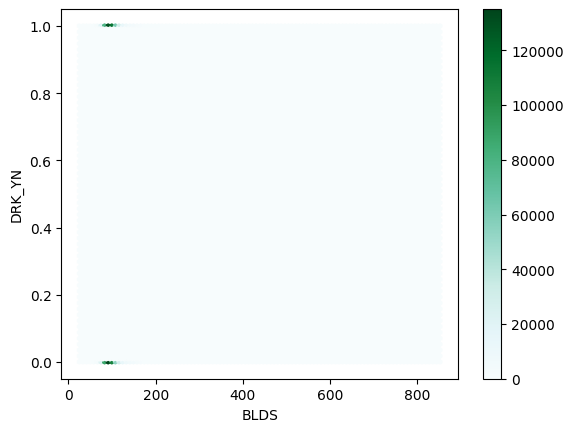

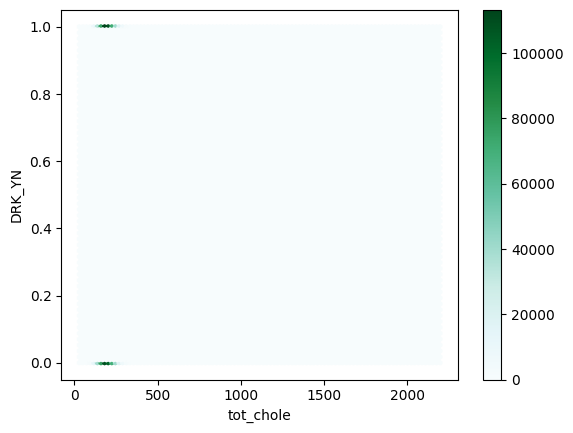

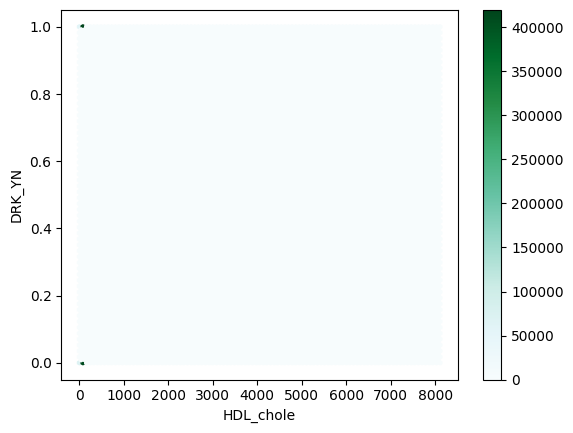

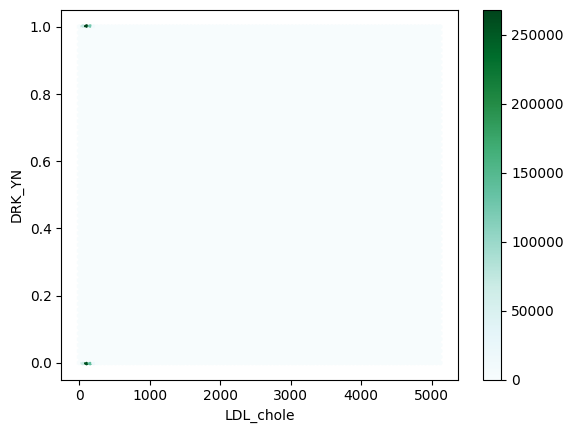

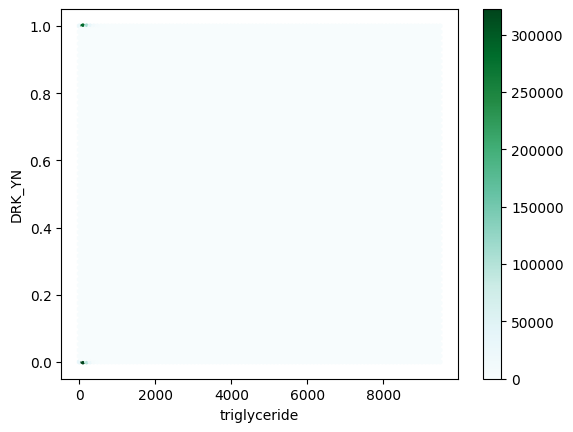

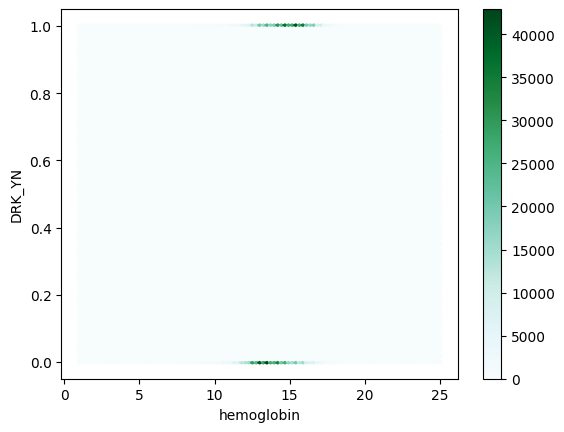

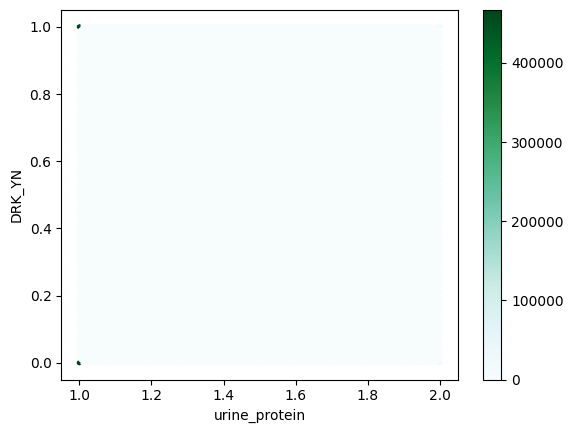

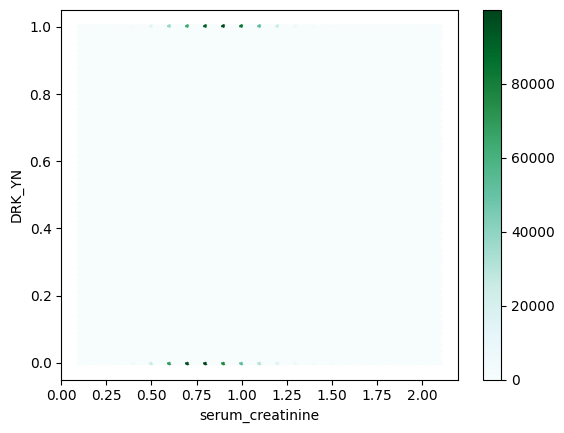

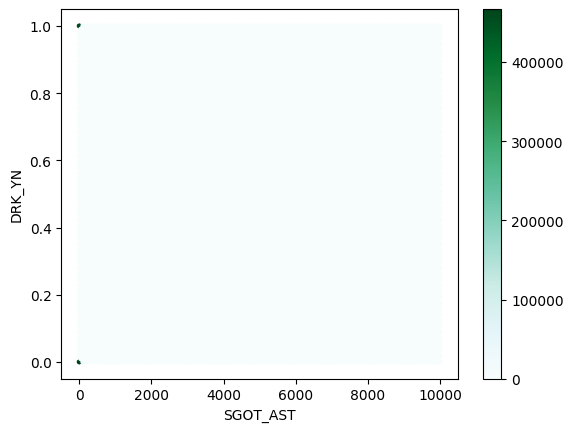

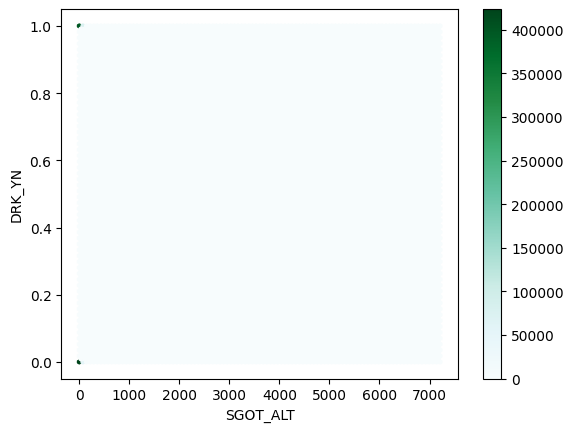

In [80]:
lis = ['weight','SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']

for i in range (0,13):
    df1.plot(kind= 'hexbin',
             x= lis[i],
             y= 'DRK_YN')

In [81]:
# implementing knn algorithm

In [82]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,15].values

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20)

scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=10, p= 2, metric='minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [87]:
y_pred = knn.predict(x_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70     96341
           1       0.71      0.63      0.67     95856

    accuracy                           0.69    192197
   macro avg       0.69      0.69      0.69    192197
weighted avg       0.69      0.69      0.69    192197

[[71739 24602]
 [35613 60243]]


In [89]:
# implementing logistic regression

In [90]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,15].values

In [91]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=1000.0, random_state= 1))
pipe.fit(x_train, y_train)  # apply scaling on training data

pipe.score(x_test, y_test)

0.704287788050802

In [92]:
# implementing decision tree

In [93]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,15].values

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20)

scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [98]:
decision_tree_model = DecisionTreeClassifier(criterion='entropy',min_samples_split = 100,
                                             max_depth = 12,
                                             random_state = 55).fit(x_train,y_train)

In [99]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.7200
Metrics validation:
	Accuracy score: 0.7058


In [100]:
# implementing multilayer perceptron

In [101]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,15].values

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20)

scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [103]:
from sklearn import neural_network

clf = neural_network.MLPClassifier(hidden_layer_sizes=50,activation='relu',learning_rate='invscaling',solver='adam',max_iter=5000, random_state=1)
clf.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=50, learning_rate='invscaling', max_iter=5000,
              random_state=1)

In [104]:
y_pred = clf.predict(x_test)

In [105]:
from sklearn import metrics
acu = metrics.accuracy_score(y_test, y_pred)
acu

0.719350458123696

In [106]:
# implementing linear regression

In [107]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,15].values

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20)

scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [111]:
y_pred = lm.predict(x_test)
y_pred

array([0.20750695, 0.54952765, 0.36142615, ..., 0.35123926, 0.61713566,
       0.67974291])

In [112]:
acu = lm.score(x_test, y_test)
acu

0.20102636176587796

In [113]:
# implementing naive bayes model

In [114]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,15].values

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20)

In [116]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [117]:
y_pred = nb.predict(x_test)

In [118]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

acu = accuracy_score(y_pred, y_test)
acu

0.6536002122821897

In [119]:
'''
I think the best suited model for the given dataset is Binary Tree Classifier as it gave the highest accuracy compared to other models.
'''

'\n\n'